# CarMax Analytics Showcase
- Competition: https://analyticsshowcase.carmax.com
- Data: https://github.com/kmx-analytics-showcase/Winter-2023

In [169]:
import numpy as np
import pandas as pd
from pySankey.sankey import sankey
import matplotlib.pyplot as plt

## Data Load

In [170]:
# load clean data
file = 'data/cleaned_data.pkl'
df = pd.read_pickle(file)
df.shape

(200000, 32)

In [171]:
# data sample
df.sample(5).T

,177328,26375,7595,12779,68282
market,8,8,14,6,11
price,$15k to $20k,$30k to $35k,$25k to $30k,$25k to $30k,$25k to $30k
model_year,2015.0,2013.0,2014.0,2013.0,2014.0
mileage,0 to 5k miles,30k to 35k miles,5k to 10k miles,15k to 20k miles,20k to 25k miles
make,HXQ,JDZ,CFK,BXO,ARU
model,HXQ_15,JDZ_33,CFK_10,BXO_2,ARU_25
premium_trim,0,0,1,0,0
body,F,F,E,G,E
color,Gray,Black,Red,White,Silver
engine_disp,1.5,2.0,2.4,3.6,3.5


In [172]:
# numeric
df.describe().round(decimals = 1).T

,count,mean,std,min,25%,50%,75%,max
model_year,200000.0,2012.6,2.1,1991.0,2012.0,2013.0,2014.0,2017.0
premium_trim,200000.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
engine_disp,200000.0,2.8,1.1,0.0,2.0,2.5,3.5,7.0
cylinders,200000.0,5.0,1.4,0.0,4.0,4.0,6.0,16.0
mpg,200000.0,25.4,5.3,12.4,21.2,24.7,29.0,57.9
horsepower,200000.0,237.0,76.6,11.0,175.0,228.0,290.0,760.0
fuel_capacity,200000.0,17.6,4.3,1.0,14.0,17.0,19.0,48.0
online_appraisal_flag,200000.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
model_year_appraisal,200000.0,2007.8,4.9,1986.0,2005.0,2009.0,2012.0,2017.0
premium_trim_appraisal,200000.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [173]:
# non-numeric
df.describe(include = ['object','category']).T

,count,unique,top,freq
market,200000,16,14,19729
price,200000,13,$20k to $25k,46388
mileage,200000,21,25k to 30k miles,18740
make,200000,37,AIH,26201
model,200000,575,HXQ_8,5528
body,200000,6,E,115268
color,200000,16,White,45231
price_appraisal,200000,9,$0k to $5k,69180
mileage_appraisal,200000,21,50k to 60k miles,14163
make_appraisal,200000,38,KQZ,21886


## Analysis Methodology

- We're starting with 13 features on a car
    - price
    - condition
        - model_year
        - mileage
    - taste
        - make
        - model
        - premium_trim
        - body
        - color
    - kinetic features
        - engine_disp
        - cylinders
        - mpg
        - horsepower
        - fuel_capacity

## Price
- This is the net revenue of an appraisal-to-purchase customer
- ~$5.9k average

### Appraisal Price

$0k to $5k      69180
$5k to $10k     38688
$10k to $15k    28387
$15k to $20k    23102
$20k to $25k    16791
$25k to $30k    10374
$30k to $35k     6093
$35k to $40k     3690
$40k+            3695
Name: price_appraisal, dtype: int64


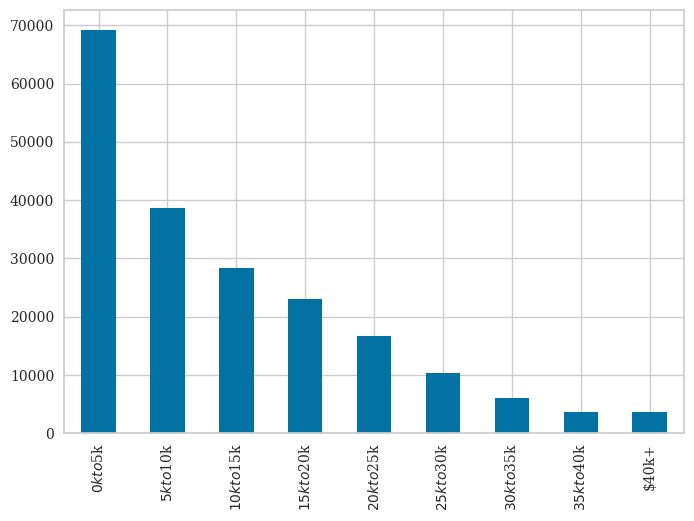

In [174]:
# appraisal offer on "old" vehicle distribution
price_appraisal = df['price_appraisal'].value_counts().sort_index()
print(price_appraisal)
ax = price_appraisal.plot.bar()

### Purchase Price

$0 to $15k       8841
$15k to $20k    34577
$20k to $25k    46388
$25k to $30k    40420
$30k to $35k    28407
$35k to $40k    20076
$40k to $45k    10697
$45k to $50k     5439
$50k to $55k     2415
$55k to $60k     1305
$60k to $65k      590
$65k to $70k      359
$70k+             486
Name: price, dtype: int64


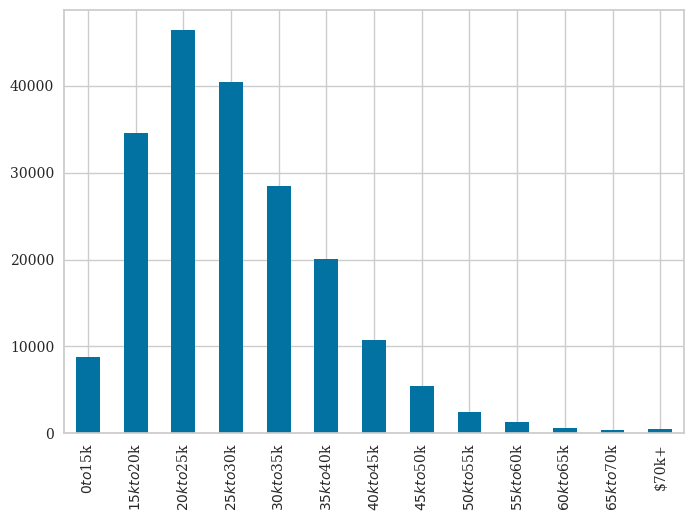

In [175]:
# purchase price of "new" vehicle distribution
price = df['price'].value_counts().sort_index()
print(price)
ax = price.plot.bar()

### Appraisal to Purchase Price

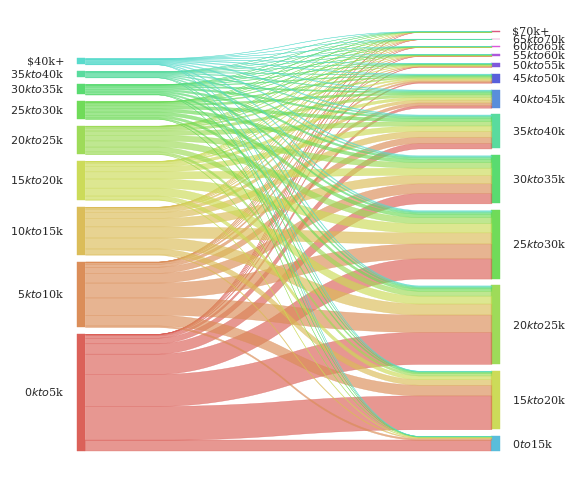

In [176]:
# movement from appraisal offer to purchase price

df = df.sort_values(by=['price_appraisal','price'])
sankey(df['price_appraisal'], df['price'], aspect=40, fontsize=8)

In [177]:
# code price ranks
df['price_appraisal_rank'] = df['price_appraisal'].cat.codes
df['price_rank'] = df['price'].cat.codes

In [178]:
# difference between customer appraisal and purchase prices
df['price_delta'] = (df['price_rank'] - df['price_appraisal_rank'])
df['price_delta'].describe().round(decimals = 1)

count    200000.0
mean          1.2
std           2.2
min          -8.0
25%           0.0
50%           1.0
75%           2.0
max          12.0
Name: price_delta, dtype: float64

In [179]:
df['price_delta'].mean()*5

5.8968

## Condition

### Model Year
- Purchase car 4.7yr newer on average

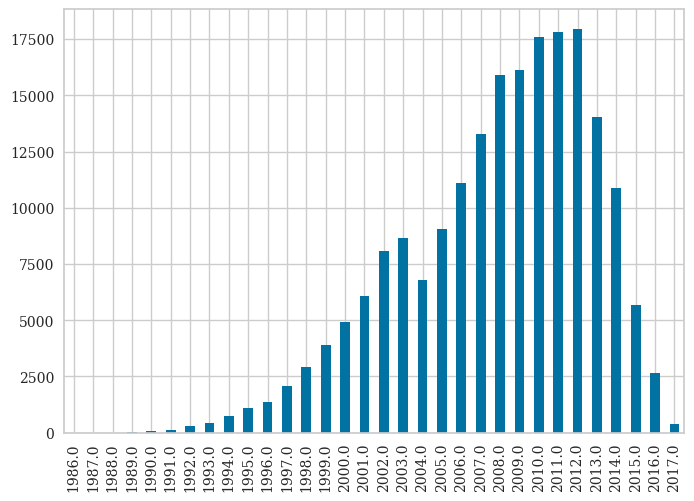

In [180]:
# "old" vehicle model year distribution
model_year_appraisal = df['model_year_appraisal'].value_counts().sort_index()
# print(model_year_appraisal)
ax = model_year_appraisal.plot.bar()

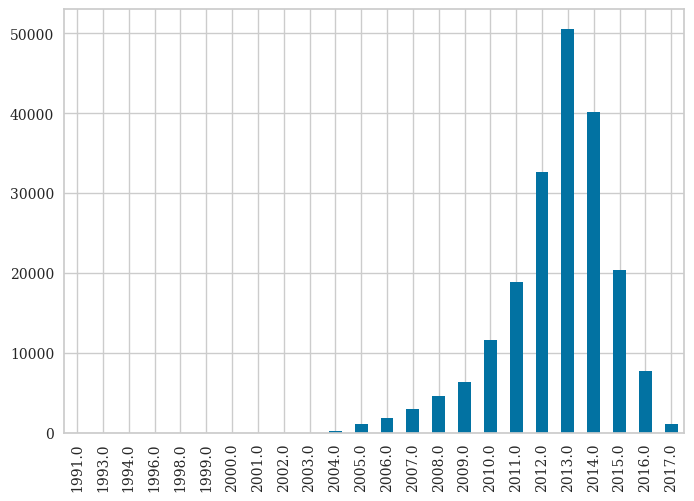

In [181]:
# "new" vehicle model year distribution
model_year = df['model_year'].value_counts().sort_index()
# print(model_year_appraisal)
ax = model_year.plot.bar()

In [182]:
year_delta = df['model_year'] - df['model_year_appraisal']
year_delta.describe().round(decimals = 1)

count    200000.0
mean          4.7
std           4.9
min         -21.0
25%           1.0
50%           4.0
75%           8.0
max          27.0
dtype: float64

### Mileage
- Purchase car with 60k fewer miles on average

21


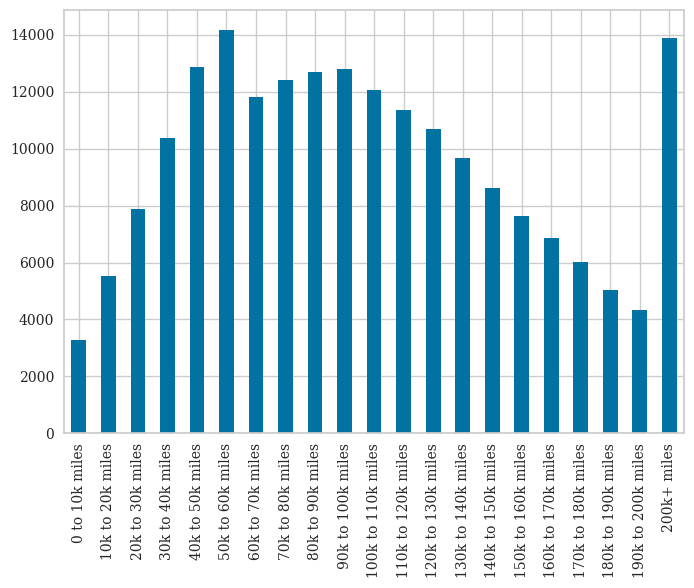

In [183]:
# mileage of "old" vehicle distribution
mileage_appraisal = df['mileage_appraisal'].value_counts().sort_index()
print(len(mileage_appraisal))
ax = mileage_appraisal.plot.bar()

21


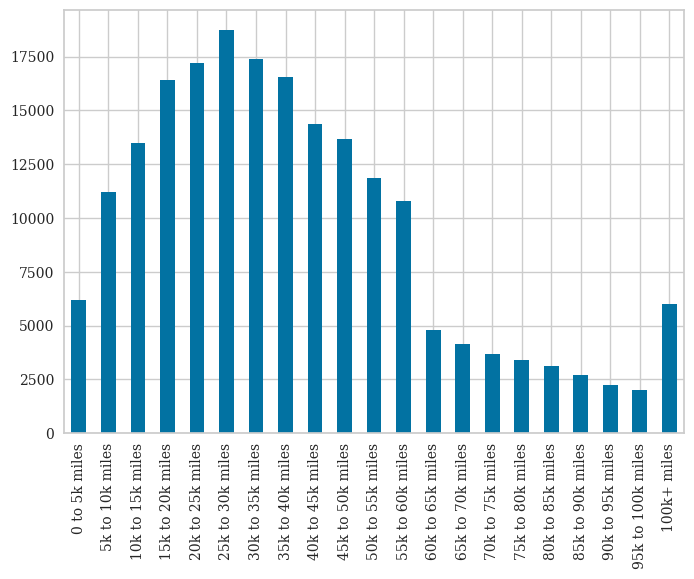

In [184]:
# mileage of "new" vehicle distribution
mileage = df['mileage'].value_counts().sort_index()
print(len(mileage))
ax = mileage.plot.bar()

In [185]:
# code mileage ranks
df['mileage_appraisal_rank'] = df['mileage_appraisal'].cat.codes*2
df['mileage_rank'] = df['mileage'].cat.codes

In [186]:
# difference between customer appraisal and mileage
df['mileage_delta'] = (df['mileage_rank'] - df['mileage_appraisal_rank'])
df['mileage_delta'].describe().round(decimals = 1)

count    200000.0
mean        -12.2
std          11.2
min         -40.0
25%         -20.0
50%         -11.0
75%          -4.0
max          20.0
Name: mileage_delta, dtype: float64

In [187]:
df['mileage_delta'].mean()*5

-61.00945

## Taste

### Make
- Brand loyalty
- 18% of customers keep the same make. I would call this low brand loyalty.

In [188]:
# customer buys same brand
df['same_make'] = np.where(df['make'].astype('str') == df['make_appraisal'].astype('str'), 1, 0)
df['same_make'].mean()

0.180895

### Model
- 6% keep same model

In [189]:
# customer buys same model
df['same_model'] = np.where(df['model'].astype('str') == df['model_appraisal'].astype('str'), 1, 0)
df['same_model'].mean()

0.063655

### Premium Trim
- 59% same trim, 26% upgrade, 15% downgrade

In [190]:
# trim change from old to new
trim_change = (df['premium_trim'] - df['premium_trim_appraisal']).value_counts()
trim_change_pct = (trim_change/trim_change.sum()).round(decimals = 2)

In [191]:
pd.DataFrame(data = {'Count':list(trim_change), 'Percent':list(trim_change_pct)}, index=['Same','Upgrade','Downgrade'])

,Count,Percent
Same,117934,0.59
Upgrade,51476,0.26
Downgrade,30590,0.15


### Body
- Customer body preference
- 47% keep same body

In [192]:
print(df['body'].value_counts().sort_index())
print(df['body_appraisal'].value_counts().sort_index())

A       921
B      5305
D     20001
E    115268
F     52259
G      6246
Name: body, dtype: int64
A     1983
B     7541
C    10252
D    15626
E    77597
F    75146
G     7470
H     4385
Name: body_appraisal, dtype: int64


In [193]:
df['same_body'] = np.where(df['body'].astype('str') == df['body_appraisal'].astype('str'), 1, 0)
df['same_body'].mean()

0.47013

### Color
- 18% keep same color

In [194]:
# top 5 colors
print(df['color'].value_counts().sort_index().head(5))
print(df['color_appraisal'].value_counts().sort_index().head(5))

Black       42936
Blue        19745
Brown        2674
Burgundy     3609
Gold         1278
Name: color, dtype: int64
Black       42852
Blue        20707
Brown        2916
Burgundy     4913
Gold         4247
Name: color_appraisal, dtype: int64


In [195]:
df['same_color'] = np.where(df['color'].astype('str') == df['color_appraisal'].astype('str'), 1, 0)
df['same_color'].mean()

0.188435

## Kinetics
- These are the aspects of the vehicle that relate to movement:
    - engine_disp, cylinders, mpg, horsepower
- Excluding fuel_capacity. Nobody picks a car this way.

In [196]:
# visualize kinetic variables

# collect
k1 = df[['engine_disp','cylinders','mpg','horsepower']]
k2 = df[['engine_disp_appraisal','cylinders_appraisal','mpg_appraisal','horsepower_appraisal']]
k2.columns = k1.columns
kinetics = pd.concat([k1,k2], axis=0, ignore_index=True)

# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kinetics = scaler.fit_transform(kinetics)

In [197]:
# smaller sample for plot
import random
sample = random.sample([*range(df.shape[0])], 10000)

In [200]:
import plotly.graph_objects as go  #for 3D plot

## 3D plot 
Scene = dict(xaxis = dict(title  = 'engine_disp'),yaxis = dict(title  = 'cylinders'),zaxis = dict(title  = 'horsepower'))

colors = kinetics[sample][:, 2] # mpg
sizes = 10
trace = go.Scatter3d(x=kinetics[sample][:, 0]
                    ,y=kinetics[sample][:, 1]
                    ,z=kinetics[sample][:, 3]
                    ,mode='markers'
                    ,marker=dict(color =colors, size=sizes, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

### PCA Dimension Reduction

In [201]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(kinetics)
print(pca.explained_variance_ratio_)


[0.84772457]


In [202]:
# construct new variables

kinetics = pca.transform(scaler.transform(k1))
df.insert(df.columns.get_loc('engine_disp'), 'kinetics', kinetics)

kinetics_appraisal = pca.transform(scaler.transform(k2))
df.insert(df.columns.get_loc('engine_disp_appraisal'), 'kinetics_appraisal', kinetics_appraisal)

In [203]:
# correlation between appraisal and new
df['kinetics_appraisal'].corr(df['kinetics']).round(decimals = 2)

0.31

<AxesSubplot:title={'center':'all vehicles'}, ylabel='Density'>

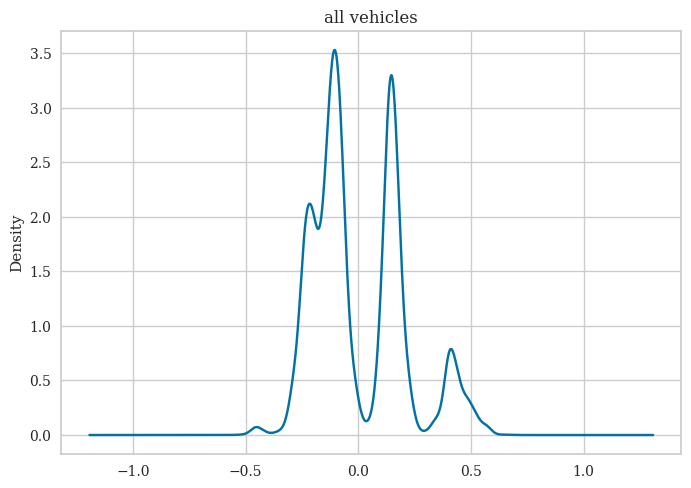

In [204]:
# all vehicles
df['kinetics'].plot.kde(bw_method = 0.1, title = 'all vehicles')

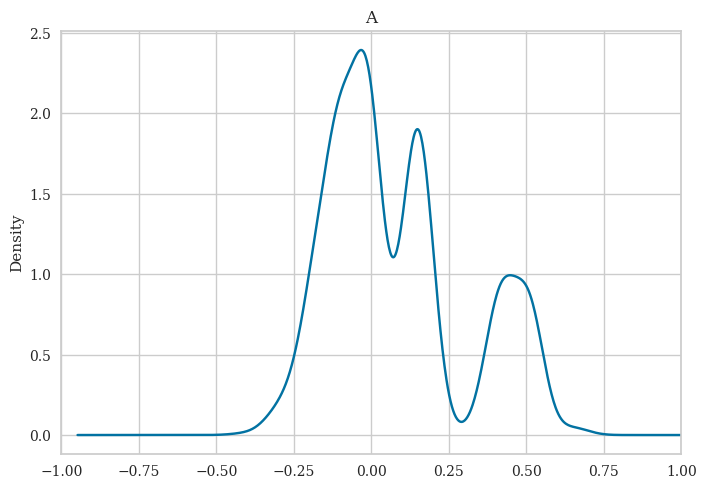

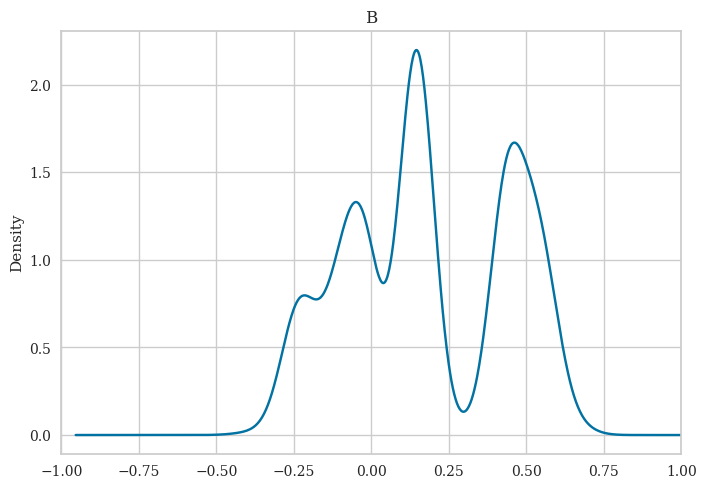

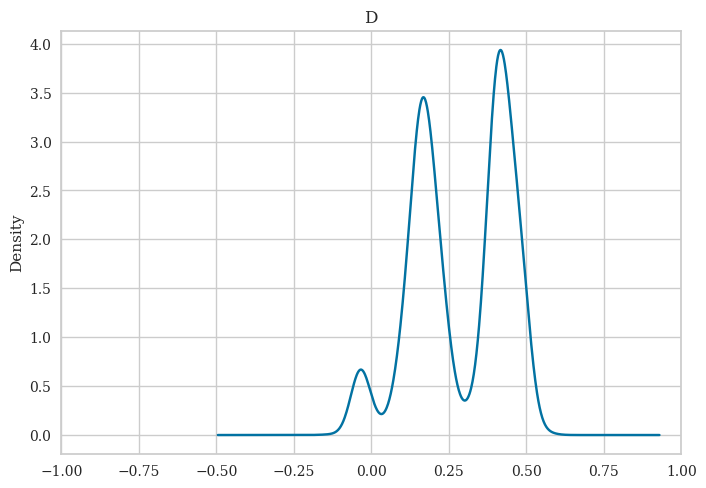

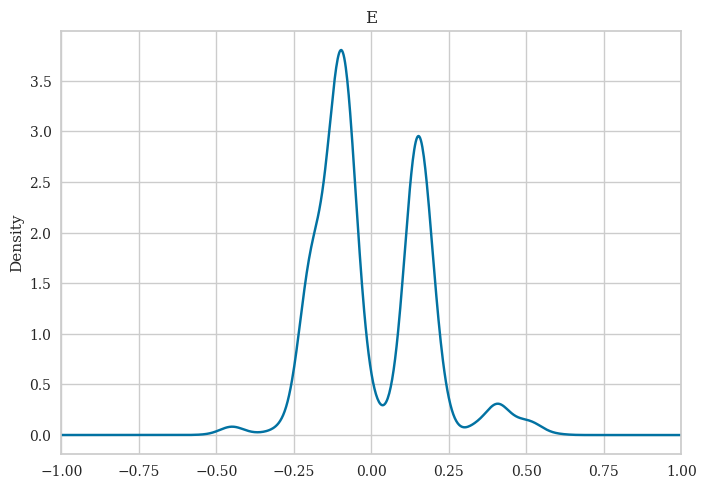

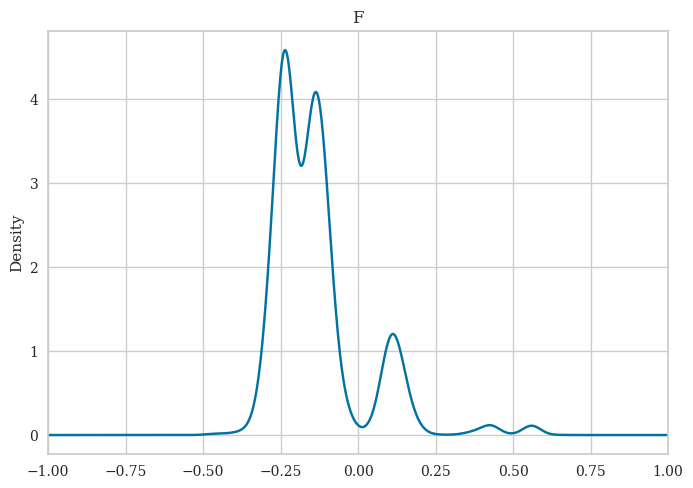

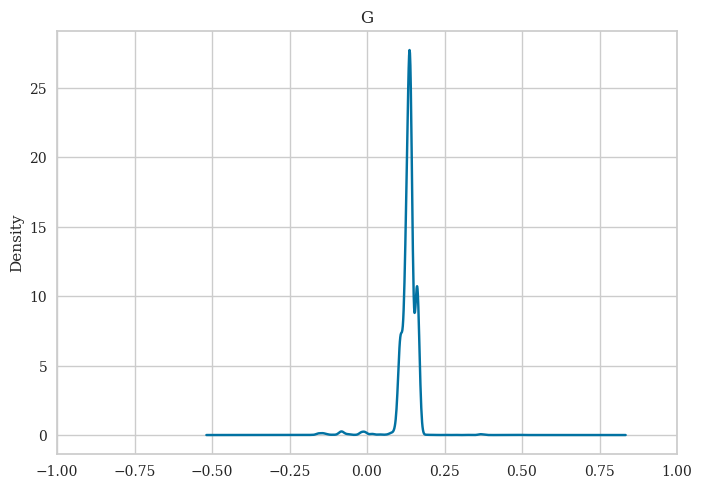

In [205]:
# vehicles by body
test_group = df[['body','kinetics']].groupby('body')
for name, group in test_group:
    group['kinetics'].plot.kde(bw_method = 0.2, title = name, xlim = (-1,1))
    plt.show()